In [328]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

sns.set_style("darkgrid")

In [142]:
# Create a list of column names found in db.info 

db = pd.read_csv("/Users/joseaveldanes/Documents/GitHub/CSS_Project_2_Team_4_Fall_2020/diabetes.csv")
db.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [143]:
##next, let's make a copy of the data
db2 = db.copy()

In [144]:
##Here we are gonna convert the diabetes number to a string 
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 95 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                --------------  -----  
 0   County                                                                                                                                                3220 non-null   object 
 1   State                                                                                                                                                 3220 non-null   object 
 2   CountyFIPS                                                                                                                                            3220 non-null   int64 

In [145]:
##First we have to deal with missing data in the objects before we can move on to visualization so: 
for category in ["Diabetes_Number", "Obesity_Number", "Physical_Inactivity_Number"]:
    replacement = np.nan
    for i in range(len(db2.loc[:,category])):
        try:
            db2.loc[i,category] = int(db2.loc[i,category])
        except:
            print(i, db2.loc[i,category])
            db2.loc[i,category] = replacement

2751 Suppressed
2311 No Data
2312 No Data
2313 No Data
2314 No Data
2315 No Data
2316 No Data
2317 No Data
2318 No Data
2319 No Data
2320 No Data
2321 No Data
2322 No Data
2323 No Data
2324 No Data
2325 No Data
2326 No Data
2327 No Data
2328 No Data
2329 No Data
2330 No Data
2331 No Data
2332 No Data
2333 No Data
2334 No Data
2335 No Data
2336 No Data
2337 No Data
2338 No Data
2339 No Data
2340 No Data
2341 No Data
2342 No Data
2343 No Data
2344 No Data
2345 No Data
2346 No Data
2347 No Data
2348 No Data
2349 No Data
2350 No Data
2351 No Data
2352 No Data
2353 No Data
2354 No Data
2355 No Data
2356 No Data
2357 No Data
2358 No Data
2359 No Data
2360 No Data
2361 No Data
2362 No Data
2363 No Data
2364 No Data
2365 No Data
2366 No Data
2367 No Data
2368 No Data
2369 No Data
2370 No Data
2371 No Data
2372 No Data
2373 No Data
2374 No Data
2375 No Data
2376 No Data
2377 No Data
2378 No Data
2379 No Data
2380 No Data
2381 No Data
2382 No Data
2383 No Data
2384 No Data
2385 No Data
2386 No D

In [147]:
##here we replace NaN with 0 so that Python can interpret this correctly 
db2=db2.replace(np.nan,0)

In [148]:
##Now that we have dealt with the NaN we can move on to converting this to string and then  integer 
db2.iloc[:,2:5] = db2.iloc[:,2:5].astype(str).astype(int)

In [149]:
db2.dtypes

County                                                                               object
State                                                                                object
CountyFIPS                                                                            int64
Diabetes_Number                                                                       int64
Obesity_Number                                                                        int64
                                                                                     ...   
sex and age_total population_18 years and over_female                                 int64
sex and age_total population_18 years and over_sex ratio (males per 100 females)    float64
sex and age_total population_65 years and over_1                                      int64
sex and age_total population_65 years and over_male                                   int64
sex and age_total population_65 years and over_female                           

In [137]:
db2

,County,State,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_asian,hispanic or latino and race_total population,sex and age_total population_male,sex and age_total population_female
0,Autauga County,Alabama,5178,13489,12525,42437,10565,159,568,55200,26874,28326
1,Baldwin County,Alabama,16707,48542,40024,179526,19764,1522,1680,208107,101188,106919
2,Barbour County,Alabama,3400,8009,5431,12216,12266,72,96,25782,13697,12085
3,Bibb County,Alabama,2371,6534,5827,17268,5018,8,37,22527,12152,10375
4,Blount County,Alabama,6282,14227,14365,55054,862,141,198,57645,28434,29211
...,...,...,...,...,...,...,...,...,...,...,...,...
3215,Sweetwater County,Wyoming,2560,9362,7518,41084,354,742,279,44117,22882,21235
3216,Teton County,Wyoming,439,2051,2005,20832,274,77,282,23059,11911,11148
3217,Uinta County,Wyoming,1440,4925,3519,19252,20,160,22,20609,10505,10104
3218,Washakie County,Wyoming,637,1738,1708,7293,1,52,0,8129,4137,3992


In [263]:
##let's also convert all floats to integer 64 types 
db2.dtypes

Diabetes_Proportion                                      float64
CountyFIPS                                                 int64
Diabetes_Number                                            int64
Obesity_Number                                             int64
Physical_Inactivity_Number                                 int64
                                                          ...   
sex and age_total population_65 years and over_1           int64
sex and age_total population_65 years and over_male        int64
sex and age_total population_65 years and over_female      int64
sum                                                        int64
Diabetes_Binarizer                                        object
Length: 96, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7bf018640>]],
      dtype=object)

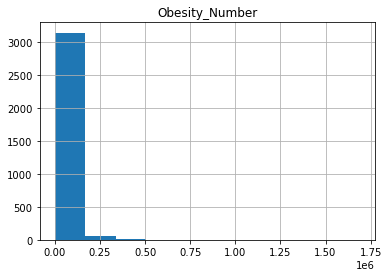

In [150]:
##Now let's do some visualization with each of the numbers of interest 
db2.hist(column = "Obesity_Number")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7c02af430>]],
      dtype=object)

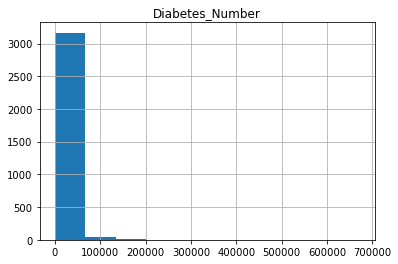

In [151]:
db2.hist(column = "Diabetes_Number")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7c0f73dc0>]],
      dtype=object)

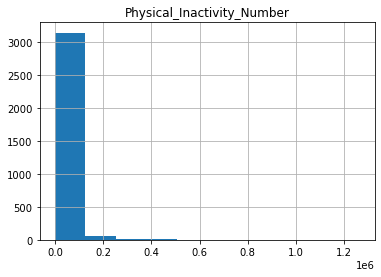

In [152]:
db2.hist(column = "Physical_Inactivity_Number")

In [153]:
##Figure out the max and see if we can meaningfully figure out other measures for all our variables 
db2.max(axis = 0, skipna = True)

County                                                                              Ziebach County
State                                                                                      Wyoming
CountyFIPS                                                                                   72153
Diabetes_Number                                                                             671407
Obesity_Number                                                                             1686908
                                                                                         ...      
sex and age_total population_18 years and over_female                                      4023752
sex and age_total population_18 years and over_sex ratio (males per 100 females)             414.7
sex and age_total population_65 years and over_1                                           1299277
sex and age_total population_65 years and over_male                                         561006
sex and ag

In [155]:
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 95 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                --------------  -----  
 0   County                                                                                                                                                3220 non-null   object 
 1   State                                                                                                                                                 3220 non-null   object 
 2   CountyFIPS                                                                                                                                            3220 non-null   int64 

In [ ]:
i = 1 
print(sum(db2.iloc[i, 4:6]))

In [167]:
#db2.iloc[:,7:44]
for i in range(10):
    totalpeople = db2.iloc[i,7]
    for j in range(8,95):
        if db2.iloc[i,j] == totalpeople:
            print(i, j)

0 37
0 44
0 64
1 37
1 44
1 64
2 37
2 44
2 64
3 37
3 44
3 64
4 37
4 44
4 64
5 8
5 10
5 37
5 44
5 64
6 37
6 44
6 64
7 37
7 44
7 64
8 37
8 44
8 64
9 37
9 44
9 64


In [168]:
##So if we look at our data, we can see that columns 8 through 10 are distinctions for folks who identify as one race or two or more races  
db2.iloc[:6,:11]

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,54170
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,204535
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,25429
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,22340
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,56710
5,Bullock County,Alabama,1011,2321,3662,3333,73.6,10352,10352,0,10352


In [171]:
##axis = 0 means you're doing rows, axis = 1 means you're doing columns 
##the reason we can make this decision is because race_total population one_race doesn't tell us about race, it just tells us who identified with one racial category 
db2.drop(['race_total population_one race', 'race_total population_two or more races', 'race_total population_one race_1'], axis=1)


,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race_white,race_total population_one race_black or african american,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,42437,10565,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,179526,19764,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,12216,12266,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,17268,5018,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,55054,862,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,Sweetwater County,Wyoming,56037,2560,9362,7518,92.0,44117,41084,354,...,30491,6159,4721,32308,16800,15508,108.3,4721,2262,2459
3216,Teton County,Wyoming,56039,439,2051,2005,94.8,23059,20832,274,...,18169,3843,3135,18625,9619,9006,106.8,3135,1526,1609
3217,Uinta County,Wyoming,56041,1440,4925,3519,97.6,20609,19252,20,...,13939,3251,2498,14538,7280,7258,100.3,2498,1234,1264
3218,Washakie County,Wyoming,56043,637,1738,1708,89.0,8129,7293,1,...,5951,2041,1686,6187,3142,3045,103.2,1686,794,892


In [201]:
##as a next step, need to find out what other categories we can drop in this analysis, the categories from 31:45 are of two or more races and it's hard to do decisions on these groups without genetic data, excluded them in the next line 
db2.iloc[:6,31:45]

,race_total population_one race_some other race,race_total population_two or more races_1,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population
0,409,1030,340,275,257,12,55200,43367,10962,464,895,115,427,55200
1,2034,3572,408,1548,855,62,208107,182689,20311,3185,2824,79,2648,208107
2,778,353,43,73,54,81,25782,12461,12492,301,155,1,800,25782
3,9,187,91,82,6,0,22527,17447,5117,90,51,0,9,22527
4,437,935,236,531,45,0,57645,55981,1124,714,292,53,479,57645
5,5,0,0,0,0,0,10352,2276,7893,122,56,0,5,10352


In [187]:
def colnames(dataframe,listofcolumns):
    listything = []
    for x in listofcolumns:
        listything.append(dataframe.columns[x])
    return listything

In [192]:
sum_column = db2['race_total population_one race_asian_asian indian'] + db2['race_total population_one race_asian_chinese'] + db2['race_total population_one race_asian_filipino'] + db2['race_total population_one race_asian_japanese'] + db2['race_total population_one race_asian_korean'] + db2['race_total population_one race_asian_vietnamese'] + db2['race_total population_one race_asian_other asian']
db2['sum'] = sum_column
db2[colnames(db2,[17,18,19,20,-1])]

,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,sum
0,0,568,0,107,568
1,15,1680,43,661,1680
2,0,96,11,0,96
3,0,37,37,0,37
4,0,198,42,47,198
...,...,...,...,...,...
3215,15,279,0,49,279
3216,0,282,6,167,282
3217,59,22,0,0,22
3218,0,0,0,0,0


In [209]:
db2.drop(colnames(db2,list(range(31,45))), axis=1)


,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,sum
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,9403,8050,41831,20054,21777,92.1,8050,3488,4562,568
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,49811,40665,162430,78104,84326,92.6,40665,18870,21795,1680
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,5658,4634,20346,10923,9423,115.9,4634,2004,2630,96
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,4323,3661,17868,9578,8290,115.5,3661,1633,2028,37
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,12400,10233,44177,21595,22582,95.6,10233,4540,5693,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,Sweetwater County,Wyoming,56037,2560,9362,7518,92.0,44117,43226,891,...,6159,4721,32308,16800,15508,108.3,4721,2262,2459,279
3216,Teton County,Wyoming,56039,439,2051,2005,94.8,23059,22875,184,...,3843,3135,18625,9619,9006,106.8,3135,1526,1609,282
3217,Uinta County,Wyoming,56041,1440,4925,3519,97.6,20609,19891,718,...,3251,2498,14538,7280,7258,100.3,2498,1234,1264,22
3218,Washakie County,Wyoming,56043,637,1738,1708,89.0,8129,7791,338,...,2041,1686,6187,3142,3045,103.2,1686,794,892,0


In [221]:
db2.iloc[:,90:]
##We've dropped all columns with any variants of  "race_two or more"

,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,sum
0,21777,92.1,8050,3488,4562,568
1,84326,92.6,40665,18870,21795,1680
2,9423,115.9,4634,2004,2630,96
3,8290,115.5,3661,1633,2028,37
4,22582,95.6,10233,4540,5693,198
...,...,...,...,...,...,...
3215,15508,108.3,4721,2262,2459,279
3216,9006,106.8,3135,1526,1609,282
3217,7258,100.3,2498,1234,1264,22
3218,3045,103.2,1686,794,892,0


In [330]:
db2.dtypes

Diabetes_Proportion                                      float64
CountyFIPS                                                 int64
Diabetes_Number                                            int64
Obesity_Number                                             int64
Physical_Inactivity_Number                                 int64
                                                          ...   
sex and age_total population_65 years and over_1           int64
sex and age_total population_65 years and over_male        int64
sex and age_total population_65 years and over_female      int64
sum                                                        int64
Diabetes_Binarizer                                        object
Length: 96, dtype: object

In [224]:
## we want to create a new column that divides number of people with diabetes by the total population in that county 
db2['Diabetes_Proportion'] = db2['Diabetes_Number']/db2['race_total population']

In [231]:
db2.iloc[:,93:97]

,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,sum,Diabetes_Proportion
0,3488,4562,568,0.093804
1,18870,21795,1680,0.080281
2,2004,2630,96,0.131875
3,1633,2028,37,0.105251
4,4540,5693,198,0.108977
...,...,...,...,...
3215,2262,2459,279,0.058028
3216,1526,1609,282,0.019038
3217,1234,1264,22,0.069872
3218,794,892,0,0.078361


In [232]:
##move diabetes proportion 
col_name="Diabetes_Proportion"
first_col = db2.pop(col_name)
db2.insert(0, col_name, first_col)

In [233]:
db2

,Diabetes_Proportion,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,...,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,sum
0,0.093804,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,...,9403,8050,41831,20054,21777,92.1,8050,3488,4562,568
1,0.080281,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,...,49811,40665,162430,78104,84326,92.6,40665,18870,21795,1680
2,0.131875,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,...,5658,4634,20346,10923,9423,115.9,4634,2004,2630,96
3,0.105251,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,...,4323,3661,17868,9578,8290,115.5,3661,1633,2028,37
4,0.108977,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,...,12400,10233,44177,21595,22582,95.6,10233,4540,5693,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,0.058028,Sweetwater County,Wyoming,56037,2560,9362,7518,92.0,44117,43226,...,6159,4721,32308,16800,15508,108.3,4721,2262,2459,279
3216,0.019038,Teton County,Wyoming,56039,439,2051,2005,94.8,23059,22875,...,3843,3135,18625,9619,9006,106.8,3135,1526,1609,282
3217,0.069872,Uinta County,Wyoming,56041,1440,4925,3519,97.6,20609,19891,...,3251,2498,14538,7280,7258,100.3,2498,1234,1264,22
3218,0.078361,Washakie County,Wyoming,56043,637,1738,1708,89.0,8129,7791,...,2041,1686,6187,3142,3045,103.2,1686,794,892,0


In [242]:
desc = db2["Diabetes_Proportion"].describe() 
desc

count    3220.000000
mean        0.093783
std         0.028551
min         0.000000
25%         0.072570
50%         0.090205
75%         0.112038
max         0.224208
Name: Diabetes_Proportion, dtype: float64

In [243]:
##So we see that .112038 makes up 75% of the distribution 
##So we can take all the counties above this threshold and label them as 1 and the ones below this threshold as 0 
conditions = [
    (db2['Diabetes_Proportion'] >= 0.112038),
    (db2['Diabetes_Proportion'] < 0.112038),
    ]
values = ['1', '0']
db2['Diabetes_Binarizer'] = np.select(conditions,values)

db2.head()

,Diabetes_Proportion,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,...,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,sum,Diabetes_Binarizer
0,0.093804,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,...,8050,41831,20054,21777,92.1,8050,3488,4562,568,0
1,0.080281,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,...,40665,162430,78104,84326,92.6,40665,18870,21795,1680,0
2,0.131875,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,...,4634,20346,10923,9423,115.9,4634,2004,2630,96,1
3,0.105251,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,...,3661,17868,9578,8290,115.5,3661,1633,2028,37,0
4,0.108977,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,...,10233,44177,21595,22582,95.6,10233,4540,5693,198,0


In [268]:
##So what we want to do is look at the features we'll be using for prediction 
X = db2.drop(['Diabetes_Proportion', 'Diabetes_Binarizer', 'Diabetes_Number'], axis = 1)
X.head()

,CountyFIPS,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,...,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,sum
0,1001,13489,12525,76.5,55200,54170,1030,54170,42437,10565,...,9403,8050,41831,20054,21777,92.1,8050,3488,4562,568
1,1003,48542,40024,86.6,208107,204535,3572,204535,179526,19764,...,49811,40665,162430,78104,84326,92.6,40665,18870,21795,1680
2,1005,8009,5431,76.2,25782,25429,353,25429,12216,12266,...,5658,4634,20346,10923,9423,115.9,4634,2004,2630,96
3,1007,6534,5827,80.5,22527,22340,187,22340,17268,5018,...,4323,3661,17868,9578,8290,115.5,3661,1633,2028,37
4,1009,14227,14365,79.7,57645,56710,935,56710,55054,862,...,12400,10233,44177,21595,22582,95.6,10233,4540,5693,198


In [269]:
print("Dimensions of Dummy Dataframe are", X.shape)
print("Dimensions of the Original Dataframe are", X.shape)

Dimensions of Dummy Dataframe are (3220, 93)
Dimensions of the Original Dataframe are (3220, 93)


In [270]:
##Train/Test/Validation Split 
y = db2['Diabetes_Binarizer']

In [271]:
from sklearn.model_selection import train_test_split

# set the random seed
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.60, test_size=0.40)

In [272]:
print("Shape of X train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_test is", y_test.shape)

Shape of X train is (1932, 93)
Shape of y_train is (1932,)
Shape of X_test is (1288, 93)
Shape of y_test is (1288,)


In [273]:
##Validation set 
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

In [274]:
print("Shape of X train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_validate is", X_validate.shape)
print("Shape of y_validate is", y_validate.shape)

Shape of X train is (1449, 93)
Shape of y_train is (1449,)
Shape of X_validate is (483, 93)
Shape of y_validate is (483,)


In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# create a model
log_reg = LogisticRegression()

# fit the model
log_model = log_reg.fit(X_train, y_train)

y_pred = log_model.predict(X_validate)


##Regression, K-Clustering, Classification, Dimensionionality Reduction, Model Selection 

ValueError: could not convert string to float: '-'

In [319]:
##Let's try to do the model using OLS and Machine Learning 

X2 = db2.drop(['Diabetes_Number', 'Diabetes_Proportion','Diabetes_Binarizer', 'sex and age_total population_65 years and over_sex ratio (males per 100 females)'], axis = 1)

##outcome for second model 
Y2 = db2['Diabetes_Proportion']

In [320]:
X2

,CountyFIPS,Obesity_Number,Physical_Inactivity_Number,race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,...,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,sum
0,1001,13489,12525,55200,54170,1030,54170,42437,10565,159,...,9403,8050,41831,20054,21777,92.1,8050,3488,4562,568
1,1003,48542,40024,208107,204535,3572,204535,179526,19764,1522,...,49811,40665,162430,78104,84326,92.6,40665,18870,21795,1680
2,1005,8009,5431,25782,25429,353,25429,12216,12266,72,...,5658,4634,20346,10923,9423,115.9,4634,2004,2630,96
3,1007,6534,5827,22527,22340,187,22340,17268,5018,8,...,4323,3661,17868,9578,8290,115.5,3661,1633,2028,37
4,1009,14227,14365,57645,56710,935,56710,55054,862,141,...,12400,10233,44177,21595,22582,95.6,10233,4540,5693,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,56037,9362,7518,44117,43226,891,43226,41084,354,742,...,6159,4721,32308,16800,15508,108.3,4721,2262,2459,279
3216,56039,2051,2005,23059,22875,184,22875,20832,274,77,...,3843,3135,18625,9619,9006,106.8,3135,1526,1609,282
3217,56041,4925,3519,20609,19891,718,19891,19252,20,160,...,3251,2498,14538,7280,7258,100.3,2498,1234,1264,22
3218,56043,1738,1708,8129,7791,338,7791,7293,1,52,...,2041,1686,6187,3142,3045,103.2,1686,794,892,0


In [321]:
# set the random seed
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2,
                                                    train_size=0.8, test_size=0.2)

In [322]:
##Here is the validation dataset 

# split the data
# Returns 4 values: X_train, X_validate, y_train, y_validate

X2_train, X2_validate, Y2_train, Y2_validate = train_test_split(X2_train, Y2_train,
                                                    train_size=0.75, test_size=0.25)

In [323]:
##Here we do ordinary least squares 

# create a model
lin_reg = LinearRegression(normalize=True)

# fit the model
lin_model = lin_reg.fit(X2_train, Y2_train)

In [324]:
print(lin_model.coef_)
print(lin_model.intercept_)

[ 3.61811854e-08  3.63363235e-08  9.10118759e-07 -1.13314388e-07
 -1.20990757e-07 -3.29949324e-07 -1.20990757e-07 -6.88848172e-07
  2.99489964e-06  1.23622229e-06  2.62549474e-06  9.40727270e-07
  9.29393083e-07  4.05583620e-06  4.45832617e-06  1.72031525e-05
  1.65056189e-05  1.65190330e-05  1.82800950e-05  1.70657291e-05
  1.99625720e-05  1.72663270e-05 -9.01727755e-07 -2.33455355e-07
 -1.38458459e-05 -1.94049396e-07 -7.35951879e-06  4.62169903e-06
 -3.29949324e-07  1.93440629e-06 -4.62634328e-06  3.56585435e-06
 -8.92954898e-06 -1.13314388e-07  2.14301331e-06 -5.55254522e-07
  1.65713094e-06 -3.98909037e-06 -3.29555817e-06 -3.04139105e-06
 -1.13314388e-07  5.94809971e-08  9.29290995e-08  1.98817410e-07
 -1.89412143e-06 -6.98236965e-08 -2.20262218e-07  2.74873136e-07
 -5.01174469e-07 -1.02966873e-06 -2.03117941e-05  1.52757943e-05
 -3.02838681e-06  1.11768267e-06  1.90180286e-05  1.15571509e-06
 -4.58938334e-07 -3.34260032e-08  2.28073996e-07 -3.20694928e-07
 -1.13314388e-07  6.84277

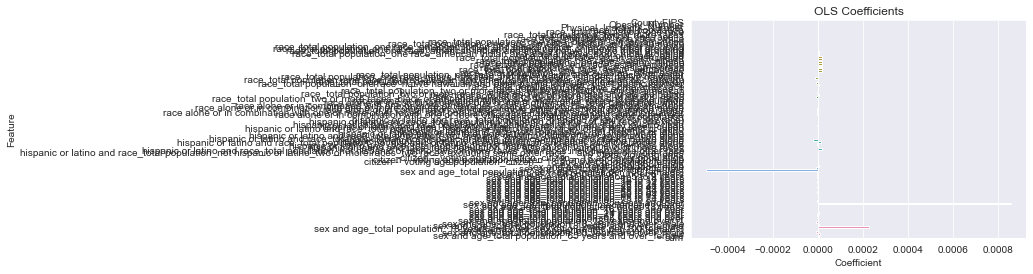

In [329]:
# Create a dataframe with the coefficient and feature names
lin_reg_data = pd.DataFrame([lin_model.coef_, X2.columns]).T
lin_reg_data.columns = ['Coefficient', 'Feature']
# Plot
ax = sns.barplot(x="Coefficient", y="Feature", data=lin_reg_data)
ax.set_title("OLS Coefficients")
plt.show()

In [310]:
X2 = X2.drop(['sex and age_total population_65 years and over_sex ratio (males per 100 females)'
], axis =1)

In [345]:
#lin_reg_data.sort_values(by='Coefficient', key=lambda x: abs(x))
lin_reg_data.sort_values(by='Coefficient')

,Coefficient,Feature
63,-0.000495944,sex and age_total population_sex ratio (males ...
50,-2.03118e-05,hispanic or latino and race_total population_n...
24,-1.38458e-05,race_total population_one race_native hawaiian...
32,-8.92955e-06,race_total population_two or more races_black ...
26,-7.35952e-06,race_total population_one race_native hawaiian...
...,...,...
18,1.82801e-05,race_total population_one race_asian_japanese
54,1.9018e-05,hispanic or latino and race_total population_n...
20,1.99626e-05,race_total population_one race_asian_vietnamese
87,0.000226571,sex and age_total population_18 years and over...


In [311]:
X2.dtypes

CountyFIPS                                                                            int64
Obesity_Number                                                                        int64
Physical_Inactivity_Number                                                            int64
race_total population                                                                 int64
race_total population_one race                                                        int64
                                                                                     ...   
sex and age_total population_18 years and over_sex ratio (males per 100 females)    float64
sex and age_total population_65 years and over_1                                      int64
sex and age_total population_65 years and over_male                                   int64
sex and age_total population_65 years and over_female                                 int64
sum                                                                             

In [264]:
##We can drop county and state 

db2 = db2.drop(['County', 'State'], axis = 1)

,CountyFIPS,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,...,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,sum
0,1001,13489,12525,76.5,55200,54170,1030,54170,42437,10565,...,9403,8050,41831,20054,21777,92.1,8050,3488,4562,568
1,1003,48542,40024,86.6,208107,204535,3572,204535,179526,19764,...,49811,40665,162430,78104,84326,92.6,40665,18870,21795,1680
2,1005,8009,5431,76.2,25782,25429,353,25429,12216,12266,...,5658,4634,20346,10923,9423,115.9,4634,2004,2630,96
3,1007,6534,5827,80.5,22527,22340,187,22340,17268,5018,...,4323,3661,17868,9578,8290,115.5,3661,1633,2028,37
4,1009,14227,14365,79.7,57645,56710,935,56710,55054,862,...,12400,10233,44177,21595,22582,95.6,10233,4540,5693,198


Dimensions of Dummy Dataframe are (3220, 93)
Dimensions of the Original Dataframe are (3220, 93)


In [267]:





print("Shape of X train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_test is", y_test.shape)

Shape of X train is (1932, 93)
Shape of y_train is (1932,)
Shape of X_test is (1288, 93)
Shape of y_test is (1288,)


In [ ]:
## Different ways of selecting features 
## Subset Selection. This approach involves identifying a subset of the p predictors that we believe to be related to the response. We then fit a model using least squares on the reduced set of variables.
## Shrinkage. This approach involves fitting a model involving all p pre- dictors. However, the estimated coefficients are shrunken towards zero relative to the least squares estimates. This shrinkage (also known as regularization) has the effect of reducing variance. Depending on what type of shrinkage is performed, some of the coefficients may be esti- mated to be exactly zero. Hence, shrinkage methods can also perform variable selection.
## Dimension Reduction. This approach involves projecting the p predic- tors into a M-dimensional subspace, where M < p. This is achieved by computing M different linear combinations, or projections, of the variables. Then these M projections are used as predictors to fit a linear regression model by least squares.

In [ ]:
# Here's what we know about the basic outline of the data: 

# 0,1,2: Country, State, FIPS 
# 3,4,5: Health Numbers 
# 6: Sex Ratio for 65+ years 
# 7-59: Race 
# 60: Total Housing Units 
# 61-94: Age and Sex Distribution 


In [ ]:
##Next we want to install matlib 
pip install matplotlib

In [ ]:
#####Next Steps: figuring out the next part of the 

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
db2['diabetes_prevalance_binary'] = lb.fit_transform(db2["Diabetes_Number"])
db2.head(10)